In [299]:
#Import Packages
#Linear Algebra
import numpy as np
#Data Processing
import pandas as pd
import sklearn
#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
from sklearn import svm
#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostClassifier

In [162]:
#To print many statements at the same time using below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [163]:
# Import datset and create a dataframe
df=pd.read_csv("Titanic_Raw.csv")
df.head()
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [165]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [166]:
#Missing Value Count
total=df.isnull().sum().sort_values(ascending=False)
per=df.isnull().sum()/df.isnull().count()*100
percentage=(round(per,2)).sort_values(ascending=False)
missing_data=pd.concat([total,percentage],axis=1,keys=['Total','%'])
missing_data

,Total,%
body,1188,90.76
cabin,1014,77.46
boat,823,62.87
home.dest,564,43.09
age,263,20.09
embarked,2,0.15
fare,1,0.08
ticket,0,0.00
parch,0,0.00
sibsp,0,0.00


In [167]:
#Replacing missing age value
median=df.groupby(['pclass'])['age'].median()
median
df=df.set_index(['pclass'])
df['age']=df['age'].fillna(median)
df=df.reset_index()
pd.isnull(df["age"]).any()
pd.isnull(df["age"]).sum()

pclass
1    39.0
2    29.0
3    24.0
Name: age, dtype: float64

False

0

In [168]:
#Replacing missing value of embarkment 
common_value='S'
df['embarked']=df['embarked'].fillna(common_value)
pd.isnull(df['embarked']).any()
pd.isnull(df['embarked']).sum()

False

0

In [169]:
#Replacing missing fare value
median_fare =df.groupby(['pclass'])['fare'].median()
median_fare
df=df.set_index(['pclass'])
df['fare']=df['fare'].fillna(median)
df=df.reset_index()
pd.isnull(df["fare"]).any()
pd.isnull(df["fare"]).sum()

pclass
1    60.0000
2    15.0458
3     8.0500
Name: fare, dtype: float64

False

0

col_0,Frequency
pclass,
1,323
2,277
3,709


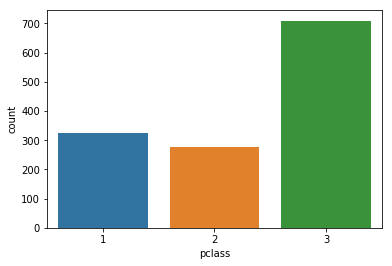

In [170]:
#Univariate Analysis
pd.crosstab(index=df.pclass,columns='Frequency')
sns.countplot(x=df.pclass)

col_0,Frequency
survived,
0,809
1,500


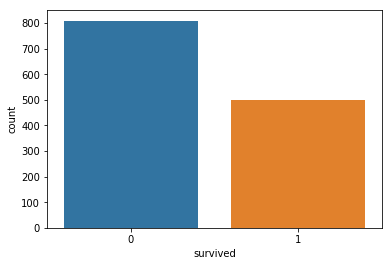

In [171]:
pd.crosstab(index=df.survived,columns='Frequency')
sns.countplot(x=df.survived)

col_0,Frequency
sex,
female,466
male,843


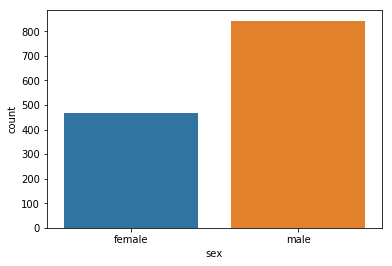

In [172]:
pd.crosstab(index=df.sex,columns='Frequency')
sns.countplot(x=df.sex)

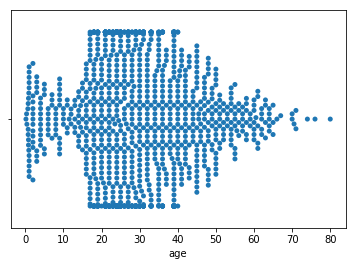

In [173]:
sns.swarmplot(x=df.age)

col_0,Frequency
sibsp,
0,891
1,319
2,42
3,20
4,22
5,6
8,9


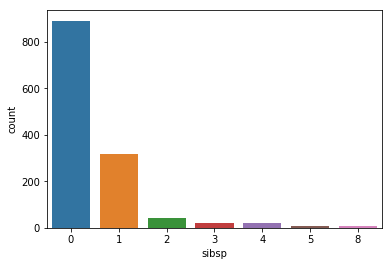

In [174]:
pd.crosstab(index=df.sibsp,columns='Frequency')
sns.countplot(x=df.sibsp)

col_0,Frequency
parch,
0,1002
1,170
2,113
3,8
4,6
5,6
6,2
9,2


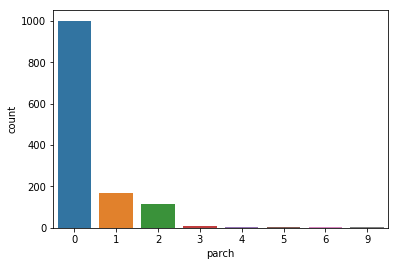

In [175]:
pd.crosstab(index=df.parch,columns='Frequency')
sns.countplot(x=df.parch)

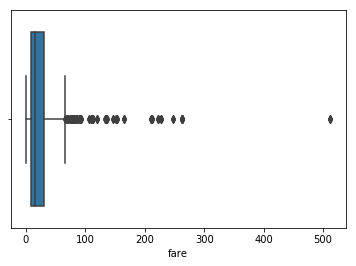

In [176]:
sns.boxplot(x=df.fare)

col_0,Frequency
embarked,
C,270
Q,123
S,916


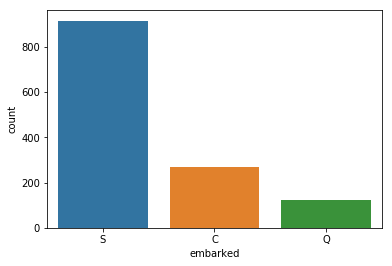

In [177]:
pd.crosstab(index=df.embarked,columns='Frequency')
sns.countplot(x=df.embarked)

Text(0.5,1,'Female')

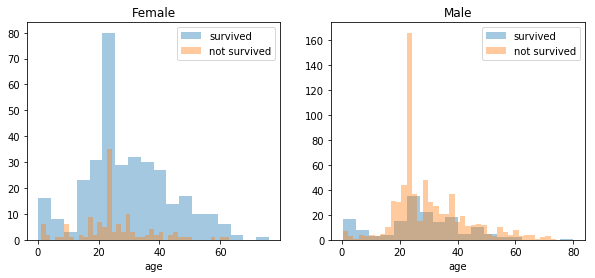

In [178]:
#Multivariate Analysis
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age, bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age, bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age, bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


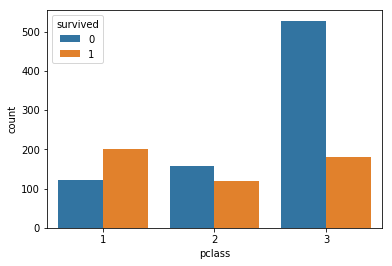

In [179]:
pd.crosstab(index=df.pclass,columns=df.survived)
sns.countplot(x=df.pclass,hue=df.survived)

survived           0    1
embarked pclass          
C        1        44   97
         2        12   16
         3        64   37
Q        1         1    2
         2         5    2
         3        73   40
S        1        78  101
         2       141  101
         3       391  104

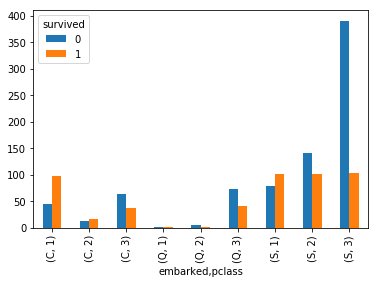

In [180]:
c=pd.pivot_table(df,index=(df.embarked,df.pclass),columns=df.survived,aggfunc='size')
c
c.plot.bar(stacked=False)

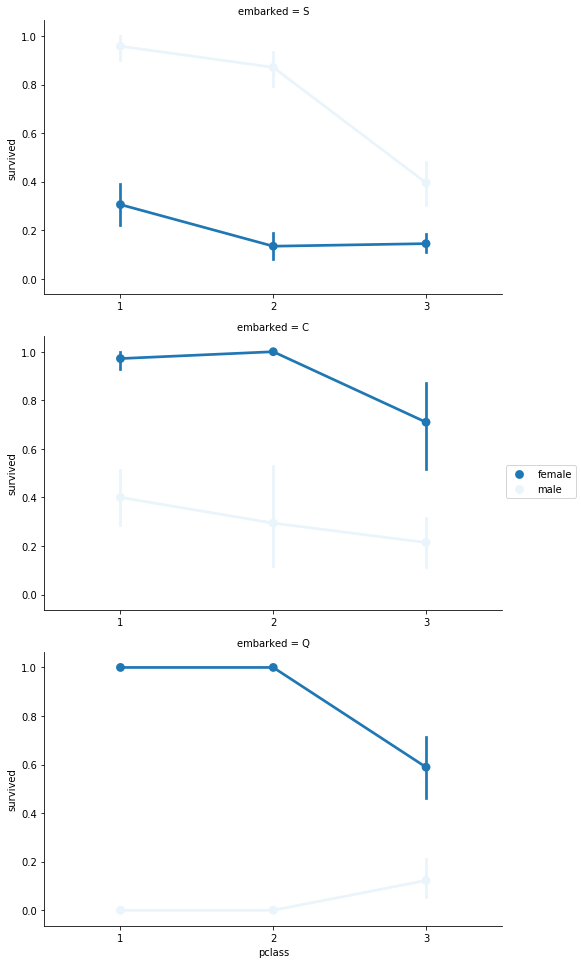

In [181]:
FacetGrid = sns.FacetGrid(df, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

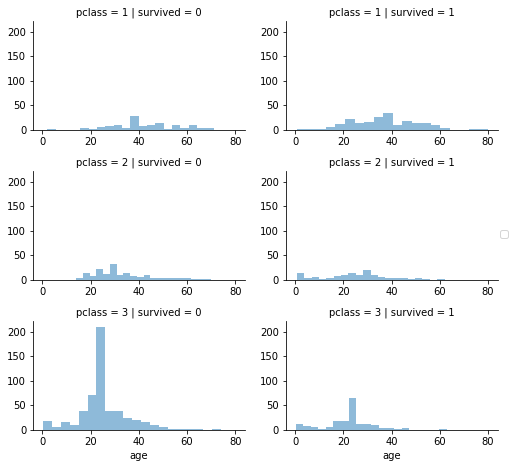

In [182]:
grid = sns.FacetGrid(df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.add_legend();

In [183]:
#Combining sibsp and parch into new variable not_alone
data=[df]
for dataset in data:
    dataset['relatives']=dataset['sibsp']+dataset['parch']
    dataset.loc[dataset['relatives']>0,'not_alone']=0
    dataset.loc[dataset['relatives']==0, 'not_alone']=1
    dataset['not_alone']=dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

In [184]:
df['relatives'].value_counts().sort_index()

0     790
1     235
2     159
3      43
4      22
5      25
6      16
7       8
10     11
Name: relatives, dtype: int64

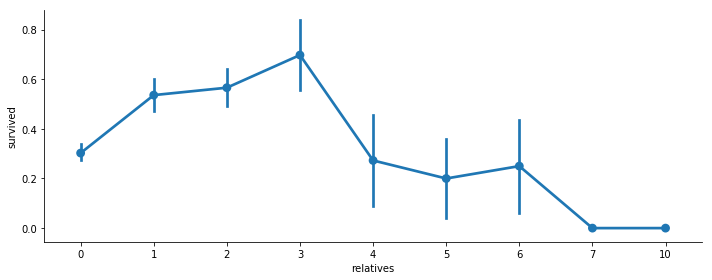

In [185]:
axes = sns.factorplot('relatives','survived', 
                      data=df, aspect = 2.5, )

In [186]:
#Extracting new feature from the variable cabin
import re
deck={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"T":8,"U":9}
data=[df]

for dataset in data:
    dataset['cabin']=dataset['cabin'].fillna("U0")
    dataset['deck']=dataset['cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck']=dataset['deck'].map(deck)
    dataset['deck']=dataset['deck'].fillna(0)
    dataset['deck']=dataset['deck'].astype(int)

In [187]:
df.deck.value_counts().sort_index()

1      22
2      65
3      94
4      46
5      41
6      21
7       5
8       1
9    1014
Name: deck, dtype: int64

survived,0,1
deck,,
1,11,11
2,18,47
3,37,57
4,14,32
5,11,30
6,8,13
7,2,3
8,1,0
9,707,307


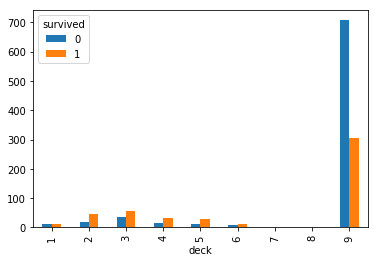

In [188]:
a=pd.crosstab(index=df.deck,columns=df.survived);a
a.plot.bar(stacked=False)

In [189]:
#Converting fare from floating vaariable into integer
data=[df]
for dataset in data:
    dataset['fare']= dataset['fare'].astype(int)

In [190]:
#Converting categorical variable in to numeric 
genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['sex'] = dataset['sex'].map(genders)

In [191]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [192]:
data=[df]
for dataset in data:
    dataset['age']=dataset['age'].astype(int)
    dataset.loc[dataset['age']<=11,'age'] = 0
    dataset.loc[(dataset['age']>11) & (dataset['age']<=18),'age']=1
    dataset.loc[(dataset['age']>18) & (dataset['age']<=22),'age']=2
    dataset.loc[(dataset['age']>22) & (dataset['age']<= 27),'age']=3
    dataset.loc[(dataset['age']>27) & (dataset['age']<= 33),'age']=4
    dataset.loc[(dataset['age']>33) & (dataset['age']<= 40),'age']=5
    dataset.loc[(dataset['age']>40) & (dataset['age']<= 66),'age']=6
    dataset.loc[dataset['age']>66,'age']=7

In [193]:
data=[df]
for dataset in data:
    dataset.loc[dataset['fare']<=7.91, 'fare']=0
    dataset.loc[(dataset['fare']>7.91) & (dataset['fare']<=14.454),'fare']=1
    dataset.loc[(dataset['fare']>14.454) & (dataset['fare']<=31),'fare']=2
    dataset.loc[(dataset['fare']>31) & (dataset['fare']<=99),'fare']=3
    dataset.loc[(dataset['fare']>99) & (dataset['fare']<=250),'fare']=4
    dataset.loc[dataset['fare']>250,'fare']=5
    dataset['fare']=dataset['fare'].astype(int)

In [194]:
#Dropping variabels from the dataframe
df=df.drop(['name','ticket','boat','body','home.dest','cabin'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
sex          1309 non-null int64
age          1309 non-null int64
sibsp        1309 non-null int64
parch        1309 non-null int64
fare         1309 non-null int64
embarked     1309 non-null int64
relatives    1309 non-null int64
not_alone    1309 non-null int64
deck         1309 non-null int64
dtypes: int64(11)
memory usage: 112.6 KB


In [195]:
df.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.355997,3.466769,0.498854,0.385027,1.526356,0.394194,0.883881,0.603514,7.729565
std,0.837836,0.486055,0.478997,1.765669,1.041658,0.865560,1.268997,0.653499,1.583639,0.489354,2.454520
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,9.000000
75%,3.000000,1.000000,1.000000,5.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,9.000000
max,3.000000,1.000000,1.000000,7.000000,8.000000,9.000000,5.000000,2.000000,10.000000,1.000000,9.000000


In [196]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck
0,1,1,1,4,0,0,4,0,0,1,2
1,1,1,0,0,1,2,4,0,3,0,3
2,1,0,1,0,1,2,4,0,3,0,3
3,1,0,0,4,1,2,4,0,3,0,3
4,1,0,1,3,1,2,4,0,3,0,3


In [197]:
#Creating independent and dependent variable
x=df.drop('survived',axis=1)
y=df['survived']
x.head()
x.shape
y.head()
y.shape

,pclass,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck
0,1,1,4,0,0,4,0,0,1,2
1,1,0,0,1,2,4,0,3,0,3
2,1,1,0,1,2,4,0,3,0,3
3,1,0,4,1,2,4,0,3,0,3
4,1,1,3,1,2,4,0,3,0,3


(1309, 10)

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

(1309,)

In [198]:
#Creating train and test data 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.15,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(1112, 10)

(197, 10)

(1112,)

(197,)

In [199]:
test_y.value_counts()

0    118
1     79
Name: survived, dtype: int64

# LOGISTIC REGRESSION

In [200]:
#Build a Logistic regression model
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [201]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [202]:
log.coef_

array([[-0.61873247,  2.28145424, -0.23829416, -0.29449214,  0.07783145,
         0.20423514,  0.16358665, -0.21666069, -0.56491253, -0.08737162]])

In [203]:
#Generate Model Diagnostics
classes=log.predict(test_x)
print(classes.size)
print('Positive Cases in Test Data:',test_y[test_y==1].shape[0])
print('Negative Cases in Test Data:',test_y[test_y==0].shape[0])

197
Positive Cases in Test Data: 79
Negative Cases in Test Data: 118


In [204]:
acc_log = round(log.score(test_x, test_y)*100,2)
acc_log

83.760000000000005

In [205]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc_log=metrics.roc_auc_score(test_y,classes)
auc_log

Accuracy Score
0.837563451777
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       118
          1       0.83      0.75      0.79        79

avg / total       0.84      0.84      0.84       197

AUC


0.82257026389186871

In [206]:
prec_log=round(precision_score(test_y,classes),2)
prec_log
recall_log=round(recall_score(test_y,classes),2)
recall_log

0.82999999999999996

0.75

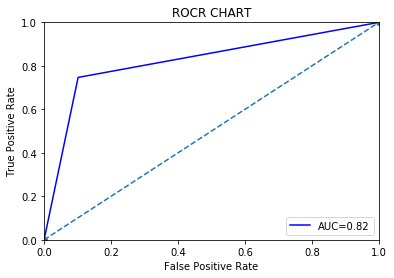

In [207]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


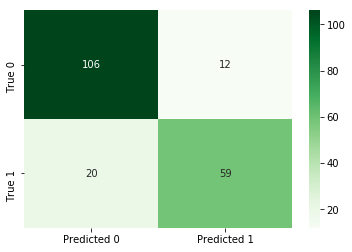

In [208]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [209]:
#Find out key predictor of Defaulter
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_index(ascending=True)

,Variable,Coeff
0,pclass,-0.618732
1,sex,2.281454
2,age,-0.238294
3,sibsp,-0.294492
4,parch,0.077831
5,fare,0.204235
6,embarked,0.163587
7,relatives,-0.216661
8,not_alone,-0.564913
9,deck,-0.087372


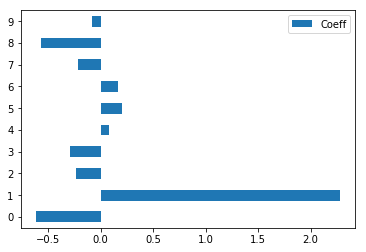

In [210]:
#Feature Importance
coeff.plot(kind='barh')
plt.show();

# SUPPORT VECTOR CLASSIFIER

In [211]:
#Build the model
linear_svc = LinearSVC()

In [212]:
#Fitting Model
linear_svc.fit(train_x,train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [213]:
#Applying our learnt model on test data
y_pred_test = linear_svc.predict(test_x)
y_pred_test

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [214]:
#Generating accuracy score
metrics.accuracy_score(test_y,y_pred_test)

0.84263959390862941

In [215]:
acc_svc = round(linear_svc.score(test_x, test_y)*100,2)
acc_svc

84.260000000000005

In [216]:
auc_svc=metrics.roc_auc_score(test_y,y_pred_test)
auc_svc
prec_svc=round(precision_score(test_y,y_pred_test),2)
prec_svc
recall_svc=round(recall_score(test_y,y_pred_test),2)
recall_svc


0.82680755202746192

0.83999999999999997

0.75

In [217]:
#Create Confusion Matrix
conf = metrics.confusion_matrix(test_y,y_pred_test)
conf

array([[107,  11],
       [ 20,  59]])

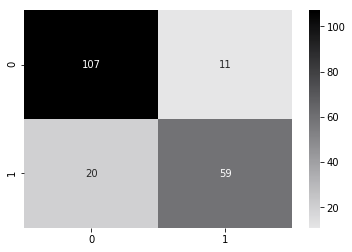

In [218]:
#Plotting confusion matrix
cmap=sns.cubehelix_palette(50, hue=0.05, rot=0,light=0.9,dark=0,as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True,fmt="d")
plt.show();

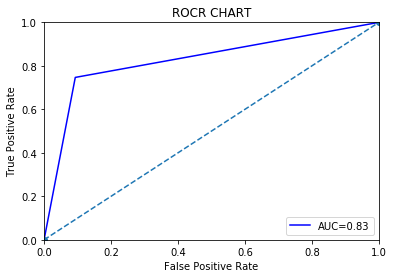

In [219]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,y_pred_test)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [220]:
#Find out key predictor of Defaulter
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(linear_svc.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_index(ascending=True)

,Variable,Coeff
0,pclass,-0.237847
1,sex,0.914912
2,age,-0.087641
3,sibsp,-0.106598
4,parch,0.031227
5,fare,0.041739
6,embarked,0.053781
7,relatives,-0.075370
8,not_alone,-0.240098
9,deck,-0.037969


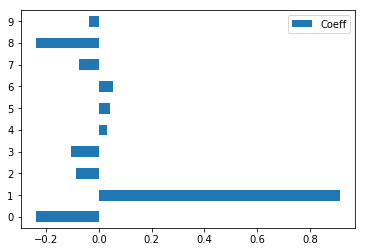

In [221]:
coeff.plot(kind='barh')
plt.show();

# Stochastic Gradient Descent (SGD)

In [222]:
#Build the model
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

In [223]:
#Fit the model
sgd.fit(train_x, train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [224]:
sgd.coef_

array([[ -38.1155664 ,  118.92056716,  -21.34471718,  -13.7216039 ,
          12.19698125,   16.77084921,   10.67235859,   -1.52462266,
         -16.77084921,    1.52462266]])

In [225]:
#Find out key predictor of Defaulter
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(sgd.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values("Variable",ascending=True)

,Variable,Coeff
2,age,-21.344717
9,deck,1.524623
6,embarked,10.672359
5,fare,16.770849
8,not_alone,-16.770849
4,parch,12.196981
0,pclass,-38.115566
7,relatives,-1.524623
1,sex,118.920567
3,sibsp,-13.721604


In [226]:
sgd.intercept_

array([ 110.18629994])

In [227]:
#Generating Model Diagnostics
y_pred = sgd.predict(test_x)

In [228]:
#Generating Accuracy Score
acc_sgd = round(sgd.score(test_x, test_y)*100,2)
acc_sgd

73.599999999999994

In [229]:
acc_sgd = round(sgd.score(train_x, train_y) * 100, 2)
acc_sgd

73.109999999999999

In [230]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,y_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,y_pred))
print("AUC")
auc_sgd=metrics.roc_auc_score(test_y,y_pred)
auc_sgd

Accuracy Score
0.736040609137
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.84      0.69      0.76       118
          1       0.63      0.81      0.71        79

avg / total       0.76      0.74      0.74       197

AUC


0.74828363012229127

In [231]:
prec_sgd=round(precision_score(test_y,y_pred),2)
prec_sgd
recall_sgd=round(recall_score(test_y,y_pred),2)
recall_sgd

0.63

0.81000000000000005

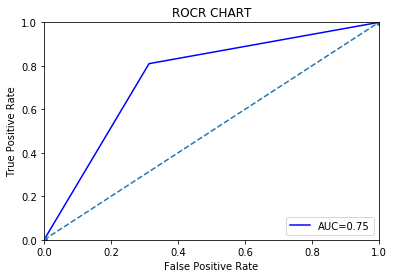

In [232]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,y_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [233]:
#Find out key predictor of Defaulter
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(sgd.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_index(ascending=True)

,Variable,Coeff
0,pclass,-38.115566
1,sex,118.920567
2,age,-21.344717
3,sibsp,-13.721604
4,parch,12.196981
5,fare,16.770849
6,embarked,10.672359
7,relatives,-1.524623
8,not_alone,-16.770849
9,deck,1.524623


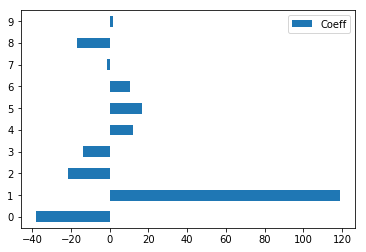

In [234]:
coeff.plot(kind='barh')
plt.show();

Confusion Matrix


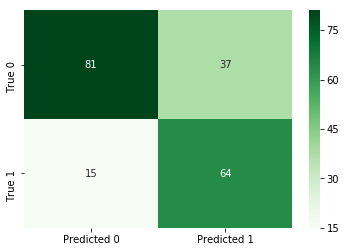

In [235]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,y_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [236]:
sgd.coef_

array([[ -38.1155664 ,  118.92056716,  -21.34471718,  -13.7216039 ,
          12.19698125,   16.77084921,   10.67235859,   -1.52462266,
         -16.77084921,    1.52462266]])

# K Nearest Neighbor

In [237]:
#Build a model
knn = KNeighborsClassifier(n_neighbors = 3)

In [238]:
#Fit a model
knn.fit(train_x,train_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [239]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')>

In [240]:
#Model Diagnosis
knn_pred = knn.predict(test_x)

In [241]:
#Genearting Accuracy Score
acc_knn=round(knn.score(test_x,test_y)*100,2)
acc_knn

75.129999999999995

In [242]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,knn_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,knn_pred))
print("AUC")
auc_knn=metrics.roc_auc_score(test_y,knn_pred)
auc_knn

Accuracy Score
0.751269035533
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.77      0.83      0.80       118
          1       0.71      0.63      0.67        79

avg / total       0.75      0.75      0.75       197

AUC


0.73170993349066726

In [243]:
prec_knn=round(precision_score(test_y,knn_pred),2)
prec_knn
recall_knn=round(recall_score(test_y,knn_pred),2)
recall_knn

0.70999999999999996

0.63

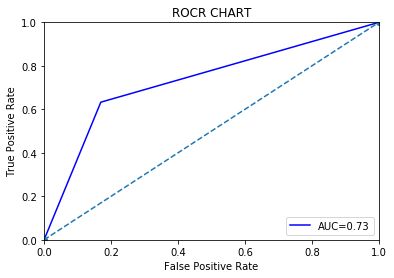

In [244]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,knn_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


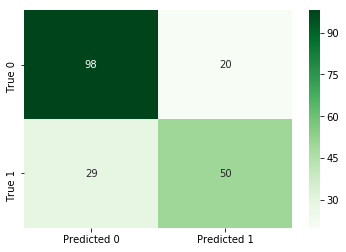

In [245]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,knn_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# Gaussian Naive Bayes

In [246]:
#Build a model
gaussian = GaussianNB()

In [247]:
#Fit a model
gaussian.fit(train_x,train_y)

GaussianNB(priors=None)

In [248]:
#Model Diagnosis
gaus_pred=gaussian.predict(test_x)

In [249]:
#Generating accuarcy score
acc_gaussian=round(gaussian.score(test_x,test_y)*100,2)
acc_gaussian

77.159999999999997

In [250]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,gaus_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,gaus_pred))
print("AUC")
auc_gaussian=metrics.roc_auc_score(test_y,gaus_pred)
auc_gaussian

Accuracy Score
0.771573604061
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.83      0.78      0.80       118
          1       0.70      0.76      0.73        79

avg / total       0.78      0.77      0.77       197

AUC


0.76957734391761434

In [251]:
prec_gaussian=round(precision_score(test_y,gaus_pred),2)
prec_gaussian
recall_gaussian=round(recall_score(test_y,gaus_pred),2)
recall_gaussian

0.69999999999999996

0.76000000000000001

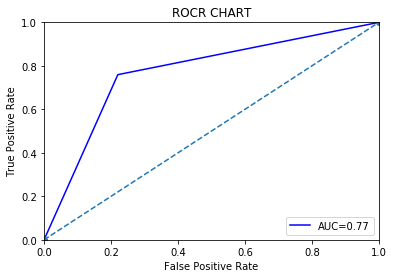

In [252]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,gaus_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


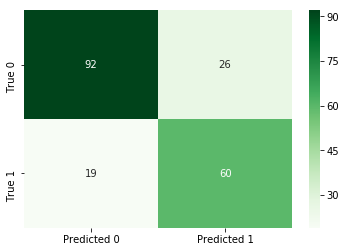

In [253]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,gaus_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# DECISION TREE

In [254]:
#Build a model
decision_tree = DecisionTreeClassifier()

In [255]:
#Fit the model
decision_tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [256]:
#Predict on test data
decision_pred= decision_tree.predict(test_x)

In [257]:
#Generating accuracy score
acc_decision_tree=round(decision_tree.score(test_x,test_y)*100,2)
acc_decision_tree

77.159999999999997

In [258]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,decision_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,decision_pred))
print("AUC")
auc_decision=metrics.roc_auc_score(test_y,decision_pred)
auc_decision

Accuracy Score
0.771573604061
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.79      0.85      0.82       118
          1       0.74      0.66      0.70        79

avg / total       0.77      0.77      0.77       197

AUC


0.7528427376099549

In [259]:
prec_decision=round(precision_score(test_y,decision_pred),2)
prec_decision
recall_decision=round(recall_score(test_y,decision_pred),2)
recall_decision

0.73999999999999999

0.66000000000000003

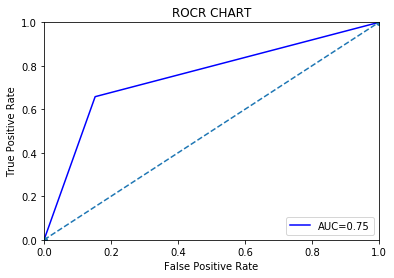

In [260]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,decision_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


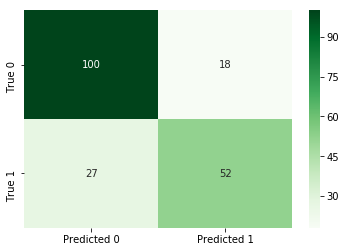

In [261]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,decision_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [262]:
decision_tree.set_params

<bound method BaseEstimator.set_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

# RANDOM FOREST

In [263]:
# Build a model
random_forest = RandomForestClassifier(n_estimators=100)

In [264]:
#Fit a model
random_forest.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [265]:
#Predicting on test data
random_pred= random_forest.predict(test_x)

In [266]:
#Generating accuracy score
acc_random_forest=round(random_forest.score(test_x,test_y)*100,2)
acc_random_forest

76.650000000000006

In [267]:
random_forest.score(train_x, train_y)

0.90377697841726623

In [268]:
random_forest.score(test_x, test_y)

0.76649746192893398

In [269]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,random_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,random_pred))
print("AUC")
auc_random=metrics.roc_auc_score(test_y,random_pred)
auc_random

Accuracy Score
0.766497461929
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       118
          1       0.74      0.65      0.69        79

avg / total       0.76      0.77      0.76       197

AUC


0.74651362368590424

In [270]:
prec_random=round(precision_score(test_y,random_pred),2)
prec_random
recall_random=round(recall_score(test_y,random_pred),2)
recall_random

0.73999999999999999

0.65000000000000002

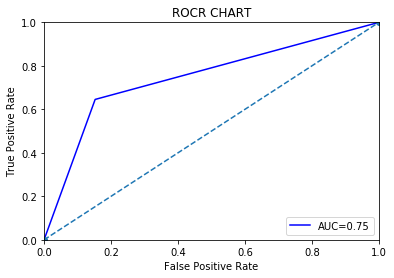

In [271]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,random_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


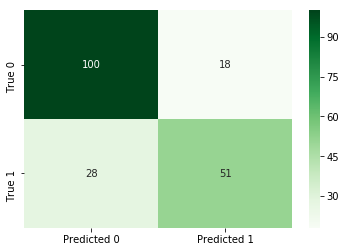

In [272]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,random_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# PERCEPTRON

In [273]:
#Build a model
perceptron = Perceptron(max_iter=5)

In [274]:
#Fit a model
perceptron.fit(train_x,train_y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [275]:
#Predicting on test data
percep_pred = perceptron.predict(test_x)


In [276]:
perceptron.score(train_x,train_y)

0.73021582733812951

In [277]:
#Generating accuracy score
acc_perceptron=round(perceptron.score(test_x,test_y)*100,2)
acc_perceptron

72.590000000000003

In [278]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,percep_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,percep_pred))
print("AUC")
auc_perceptron=metrics.roc_auc_score(test_y,percep_pred)
auc_perceptron

Accuracy Score
0.725888324873
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.70      0.96      0.81       118
          1       0.86      0.38      0.53        79

avg / total       0.76      0.73      0.69       197

AUC


0.66868697704355295

In [279]:
prec_perceptron=round(precision_score(test_y,percep_pred),2)
recall_perceptron=round(recall_score(test_y,percep_pred),2)

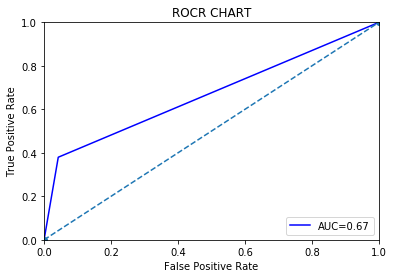

In [280]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,percep_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


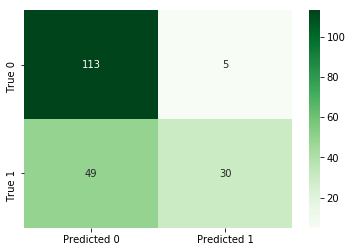

In [281]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,percep_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# Linear Discriminant Analysis

In [282]:
#Build a model
lda=LinearDiscriminantAnalysis()

In [283]:
#Fit a model
lda.fit(train_x,train_y)

/home/munirajumalathi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [284]:
#Predicting on test data
lda_predict=lda.predict(test_x)

In [285]:
#Generating accuracy score
acc_lda=round(lda.score(test_x,test_y)*100,2)
acc_lda

84.260000000000005

In [286]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,lda_predict))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,lda_predict))
print("AUC")
auc_lda=metrics.roc_auc_score(test_y,lda_predict)
auc_lda

Accuracy Score
0.842639593909
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.84      0.91      0.87       118
          1       0.84      0.75      0.79        79

avg / total       0.84      0.84      0.84       197

AUC


0.82680755202746192

In [287]:
prec_lda=round(precision_score(test_y,lda_predict),2)
prec_lda
recall_lda=round(recall_score(test_y,lda_predict),2)
recall_lda

0.83999999999999997

0.75

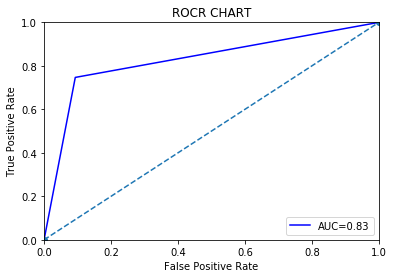

In [288]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,lda_predict)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


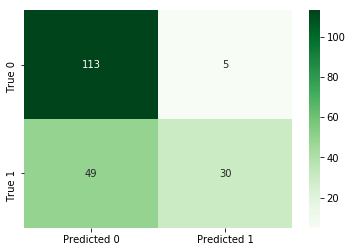

In [289]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,percep_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# AdaBoost Classifier

In [290]:
#Build a model

ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

In [291]:
#Fit a model
ada.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [292]:
#Predict on the test data
ada_predict=ada.predict(test_x)

In [293]:
#Generating accuracy score
acc_ada=round(ada.score(test_x,test_y)*100,2)
acc_ada

81.730000000000004

In [294]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,ada_predict))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,ada_predict))
print("AUC")
auc_ada=metrics.roc_auc_score(test_y,ada_predict)
auc_ada

Accuracy Score
0.817258883249
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.85      0.85      0.85       118
          1       0.77      0.77      0.77        79

avg / total       0.82      0.82      0.82       197

AUC


0.80980476292641068

In [295]:
prec_ada=round(precision_score(test_y,ada_predict),2)
prec_ada
recall_ada=round(recall_score(test_y,ada_predict),2)
recall_ada

0.77000000000000002

0.77000000000000002

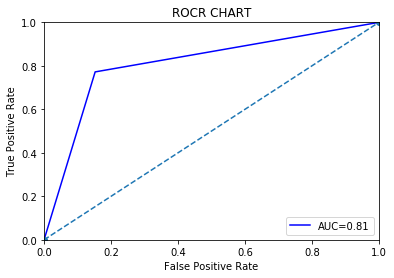

In [296]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,ada_predict)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


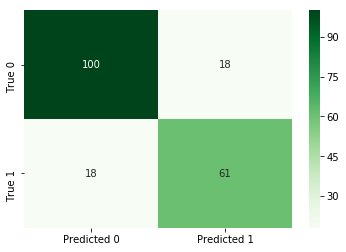

In [297]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,ada_predict)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# Results

In [298]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree','Linear Discriminant Analysis','AdaBoost Classifier'],
    'Accuracy': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree, acc_lda,acc_ada],
    'AUC':[auc_svc,auc_knn,auc_log,auc_random,auc_gaussian,
                 auc_perceptron,auc_sgd,auc_decision, auc_lda,auc_ada],
    'Precision': [prec_svc,prec_knn,prec_log,prec_random,prec_gaussian,
                  prec_perceptron,prec_sgd,prec_decision,prec_lda,prec_ada],
    'Recall':[recall_svc,recall_knn,recall_log,recall_random,recall_gaussian,
              recall_perceptron,recall_sgd,recall_decision,recall_lda,recall_ada]})
result_df = results.sort_values(by='AUC', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(15)

,AUC,Accuracy,Precision,Recall
Model,,,,
Support Vector Machines,0.826808,84.26,0.84,0.75
Linear Discriminant Analysis,0.826808,84.26,0.84,0.75
Logistic Regression,0.822570,83.76,0.83,0.75
AdaBoost Classifier,0.809805,81.73,0.77,0.77
Naive Bayes,0.769577,77.16,0.70,0.76
Decision Tree,0.752843,77.16,0.74,0.66
Stochastic Gradient Decent,0.748284,73.11,0.63,0.81
Random Forest,0.746514,76.65,0.74,0.65
KNN,0.731710,75.13,0.71,0.63
